<a href="https://colab.research.google.com/github/eleanorformosa/CS6405_Datasets/blob/main/DM_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 04
In this lab, we experiment how to ID3 decides in which attribute to branch.
We test how to compute the Entropy and the Information Gain.

### Dataset
Let's considet the Titanic dataset available on:
https://github.com/andvise/DataAnalyticsDatasets/blob/main/titanic.csv

In [4]:
import pandas as pd
df = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/dc74027bd063510ede437e4d612f41eb078e49b9/titanic.csv?raw=true")

The goal is to predict if the passenger survived or not. Your task is to decide if the first branch of the decision tree should use the **Sex** or the **Pclass** attribute and why.

### Entropy function
The first step is to create a function that computes the entropy of a dataframe for a given attribute(column).

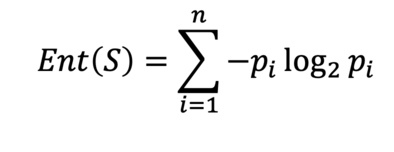

In [23]:
import math
def entropy(data, column):
  total = data[column].count()
  unique_vals = data[column].unique()

  ent = 0

  for val in unique_vals:
    cnt = sum(data[column] == val)
    p = (cnt/total)
    ent = ent + -p * math.log2(p)

  return ent

In [29]:
sum(df.Survived == 1)

342

In [30]:
entropy(df, "Survived") # it should be 0.9618806789594468

0.9618806789594467

Compute the entropy for **Sex = male**

In [31]:
df_male = df[df["Sex"] == "male"]
entropy(df_male, "Survived") # it should be 0.7019458258949879

0.7019458258949879

## Compute the Information Gain
Now try to compute the Information Gain obtained by branching on **Sex** or on **Pclass**.
Use:
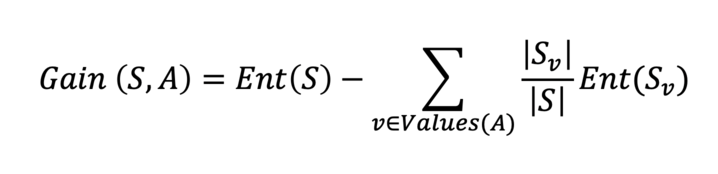

Which is the first node that an ID3 algorithm would create?

In [41]:
# Branching on gender
df_female = df[df["Sex"] == "female"]
gain = entropy(df, "Survived") - (len(df_male)/len(df)) * entropy(df_male, "Survived") - (len(df_female)/len(df)) * entropy(df_female, "Survived")
gain

0.21684950483126514

In [46]:
# Branching on p class
df_c1 = df[df["Pclass"] == 1]
df_c2 = df[df["Pclass"] == 2]
df_c3 = df[df["Pclass"] == 3]

gain = entropy(df, "Survived") - (len(df_c1)/len(df)) * entropy(df_c1, "Survived") - (len(df_c2)/len(df)) * entropy(df_c2, "Survived") - (len(df_c3)/len(df)) * entropy(df_c3, "Survived")
gain

0.08286373372692335

In [55]:
# Writing into a function
def information_gain(branch, data, target):
  gain = entropy(data, target)
  unique_vals = data[branch].unique()
  for val in unique_vals:
    Sv = data[data[branch] == val] # create sub data frame
    gain -= (len(Sv)/len(data)) * entropy(Sv, target)
  return gain

information_gain("Sex", df, "Survived")
information_gain("Pclass", df, "Survived")

0.08286373372692335